In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
import os
from skimage import io
import random

In [2]:
root_dir = './dataset'
csv_file = pd.read_csv('./dataset/face-mask-detection-dataset.csv')

n = random.randint(0, len(csv_file))
img_name = csv_file.iloc[n,0]
label = csv_file.iloc[n,1]
if (label==0):
    img_path = os.path.join(root_dir, 'aug', 'without_mask', img_name)
    img = io.imread(img_path)
else:
    img_path = os.path.join(root_dir, 'aug', 'with_mask', img_name)
    img = io.imread(img_path)

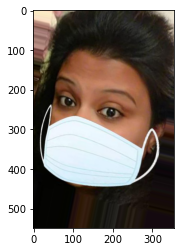

In [3]:
plt.imshow(img)

In [4]:
augmentation_transform = transforms.Compose([
    transforms.RandomResizedCrop((320,320)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.6, contrast=0.2, saturation=0.6),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [5]:
from PIL import Image
img1 = Image.fromarray(img)
aug_img = augmentation_transform(img1)
# plt.imshow(aug_img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aug_0_3338.png
1


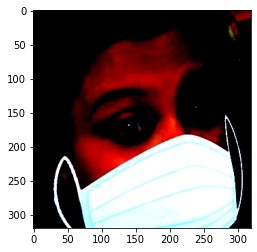

In [6]:
print(img_name)
print(label)
plt.imshow(aug_img.permute(1,2,0))